In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/powerlifting-base/openipf-2023-10-28-91d2cada.csv


In [2]:
df = pd.read_csv('/kaggle/input/powerlifting-base/openipf-2023-10-28-91d2cada.csv', index_col='Division')

/tmp/ipykernel_32/539111967.py:1: DtypeWarning: Columns (33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/powerlifting-base/openipf-2023-10-28-91d2cada.csv', index_col='Division')


what we need:
* name
* sex
* event
* equipment
* age class
* weightclasskg
* tested
* all squat, bench, deadlift, total, place
* country
* parent federation


In [3]:
pd.set_option('display.max_columns', 40) #all of our columns
pd.set_option('display.max_rows', 10)

**I drop unnecessary columns to make the data clearer for further operations.**

In [4]:
columns_to_drop = ['Age','AgeClass','Dots','Wilks','Glossbrenner','Goodlift','State','Date','MeetCountry','MeetState','MeetTown','MeetName']
df = df.drop(columns=columns_to_drop)

**I will quickly discuss the principles of powerlifting. To obtain the overall result, we need to complete 1 of 3 attempts in each exercise. If we fail all attempts in any exercise, we are eliminated from the total score. Therefore, we exclude from our database the results in which the players did not obtain the total result because we will need it. The 4th attempt remains in the database only because it is in the rules, but it is extremely rarely granted to a lifter**

In [5]:
positiv_total_result = (df[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']] > 0).any(axis=1) & (df[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']] > 0).any(axis=1) & (df[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']] > 0).any(axis=1)
df = df[positiv_total_result]

**Now I was sorting records for athletes who compete in the IPF and competed without equipment**

*IPF - International Powerlifting Federation*

In [6]:
is_contest_in_ipf = (df['ParentFederation'] == 'IPF') & (df['Equipment'] == 'Raw') & (df['Sex'] == 'F')
df = df[is_contest_in_ipf]

**I have now selected the weight categories for women ( they are no longer current but contain the most data until 2023 )**

*Category : 43 (to 18yo after starts with 47kg), 47 kg, 52 kg, 57 kg, 63 kg, 69 kg, 76kg, 84 kg, 84 kg +*

In [7]:
weight_classes_female_ipf_current = ['43','47','52','57','63','69','76','84','84+']
weight_classes_female_ipf_only = df['WeightClassKg'].isin(weight_classes_female_ipf_current)
df[weight_classes_female_ipf_only]

,Name,Sex,Event,Equipment,BirthYearClass,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Tested,Country,Federation,ParentFederation
Division,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Open,Ali Gascoine,F,SBD,Raw,NaN,50.60,52,85.0,90.0,92.5,NaN,92.5,57.5,60.0,62.5,NaN,62.5,137.5,142.5,150.0,NaN,150.0,305.0,2,Yes,New Zealand,OceaniaPF,IPF
Open,Megan Hinchley,F,SBD,Raw,24-39,51.00,52,-90.0,-90.0,90.0,NaN,90.0,50.0,52.5,-55.0,NaN,52.5,100.0,107.5,112.5,NaN,112.5,255.0,5,Yes,Australia,OceaniaPF,IPF
Open,Mary Macken,F,SBD,Raw,50-59,51.20,52,115.0,117.5,120.0,NaN,120.0,55.0,57.5,60.0,NaN,60.0,145.0,147.5,150.0,NaN,150.0,330.0,1,Yes,Australia,OceaniaPF,IPF
Juniors,Rae-Leigh Lyons,F,SBD,Raw,19-23,51.50,52,70.0,75.0,77.5,NaN,77.5,47.5,50.0,52.5,NaN,52.5,102.5,110.0,-117.5,NaN,110.0,240.0,1,Yes,Australia,OceaniaPF,IPF
Open,Elizabeth Craven,F,SBD,Raw,24-39,51.80,52,-92.5,92.5,-95.0,NaN,92.5,60.0,62.5,66.0,NaN,66.0,117.5,122.5,125.0,NaN,125.0,283.5,3,Yes,Australia,OceaniaPF,IPF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Juniors,Mahailya Reeves,F,SBD,Raw,19-23,141.00,84+,220.0,225.0,230.0,NaN,230.0,152.0,-164.5,164.5,NaN,164.5,190.0,200.0,-222.5,NaN,200.0,594.5,1,Yes,USA,IPF,IPF
Juniors,Regina Meier,F,SBD,Raw,19-23,125.00,84+,175.0,187.5,192.5,NaN,192.5,95.0,102.5,107.5,NaN,107.5,147.5,160.0,165.0,NaN,165.0,465.0,2,Yes,Kazakhstan,IPF,IPF
Juniors,Leah Gregory,F,SBD,Raw,19-23,97.10,84+,165.0,175.0,182.5,NaN,182.5,92.5,100.0,-107.5,NaN,100.0,155.0,165.0,170.0,NaN,170.0,452.5,3,Yes,Canada,IPF,IPF


**I grouped the data by the 'Country' column and then calculated the median for the total scores for each country. I used descending sort**

In [35]:
group_by_country = df.groupby(['Country'])
median_totalkg = group_by_country['TotalKg'].median().sort_values(ascending=False)
median_totalkg

Country
Jamaica      532.50
Cambodia     492.50
Slovakia     470.00
Samoa        455.00
Cameroon     442.50
              ...  
Syria        255.00
Guatemala    247.21
Romania      242.50
China        242.50
Pakistan     235.00
Name: TotalKg, Length: 121, dtype: float64

**I selected the top5 and bottom5 results and combined them to get an overview of the extreme ends of the results list**

In [9]:
median_totalkg_top5 = median_totalkg.nlargest(5)
median_totalkg_bottom5 = median_totalkg.nsmallest(5)
median_totalkg_data_bar_chart = pd.concat([median_totalkg_top5,median_totalkg_bottom5], axis='rows')
median_totalkg_data_bar_chart

Country
Jamaica      532.50
Cambodia     492.50
Slovakia     470.00
Samoa        455.00
Cameroon     442.50
Pakistan     235.00
Romania      242.50
China        242.50
Guatemala    247.21
Syria        255.00
Name: TotalKg, dtype: float64

**I presented the results using a bar chart. I additionally used result annotations at the top of the bars**

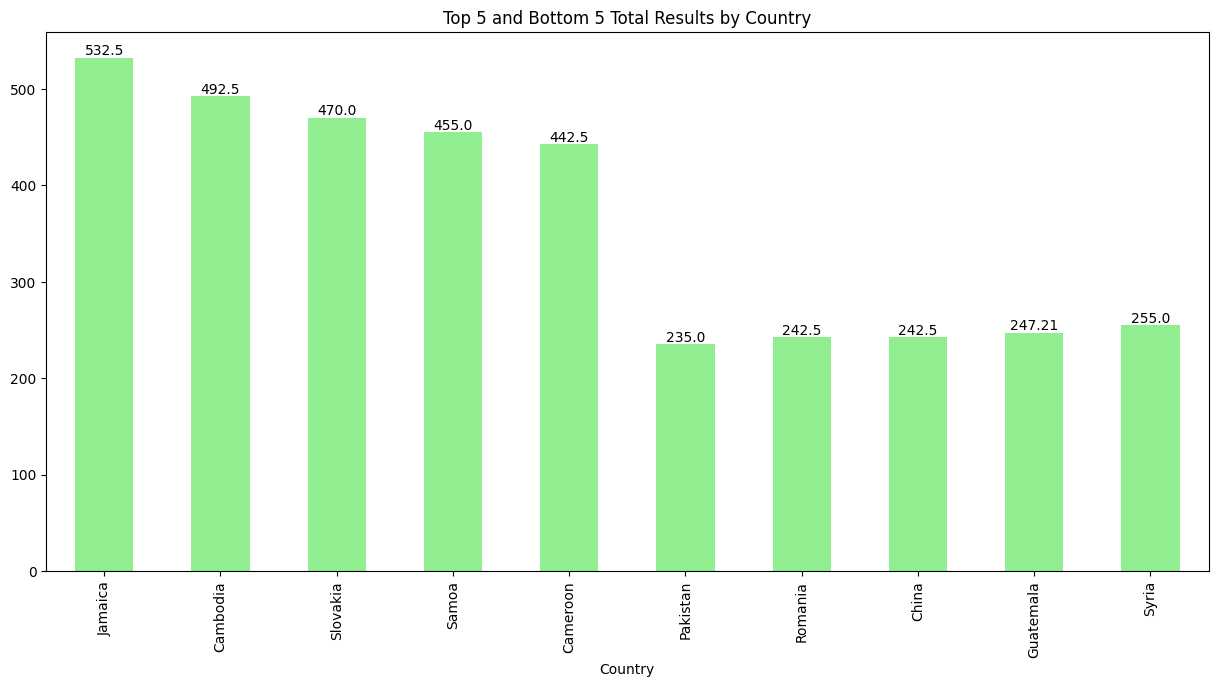

In [10]:
plt.figure(figsize=(15, 7))
median_totalkg_bar_chart = median_totalkg_data_bar_chart.plot.bar(x='Country', y='TotalKg', color='lightgreen')
plt.xticks()
plt.title('Top 5 and Bottom 5 Total Results by Country')
for i, value in enumerate(median_totalkg_data_bar_chart):
    median_totalkg_bar_chart.annotate(str(value), (i, value), ha='center', va='bottom')

**Having noticed quite unexpected results for countries whose population is very low, I decided to introduce a criterion of at least 100 registered results in total.**
*I'll call it the 'gth' criterion - greater than one hundred*

In [93]:
df_median_totalkg_data_bar_chart = median_totalkg_data_bar_chart.reset_index(name='MedianTotalKg')
smallest_total = df_median_totalkg_data_bar_chart['MedianTotalKg'].min()
largest_total = df_median_totalkg_data_bar_chart['MedianTotalKg'].max()
diff_larg_small_total = (smallest_total / largest_total) * 100
diff_larg_small_total

44.13145539906103

In [11]:
count_total_results = group_by_country['TotalKg'].count()
group_w_gth = count_total_results[count_total_results > 100]
group_w_gth

Country
Australia     2610
Austria        153
Belgium        378
Brazil         364
Canada        5347
             ...  
UAE            154
UK             289
USA          39882
Ukraine        261
Wales          264
Name: TotalKg, Length: 40, dtype: int64

In [61]:
median_totalkg_gth_grp = group_by_country['TotalKg'].median().sort_values(ascending=False)
only_gth_grp_median_results = median_totalkg_gth_grp[group_w_gth.index].sort_values(ascending=False)
only_gth_grp_median_results

Country
Denmark        386.25
Sweden         380.00
Switzerland    377.50
Hungary        377.50
Iceland        369.00
                ...  
Lithuania      297.50
Ukraine        282.50
India          282.50
Croatia        275.00
Serbia         265.00
Name: TotalKg, Length: 40, dtype: float64

In [66]:
fixed_median_totalkg_top5 = only_gth_grp_median_results.nlargest(5)
fixed_median_totalkg_bottom5 = only_gth_grp_median_results.nsmallest(5)
fixed_median_totalkg_data = pd.concat([fixed_median_totalkg_top5,fixed_median_totalkg_bottom5], axis='rows')
fixed_median_totalkg_data

Country
Denmark        386.25
Sweden         380.00
Switzerland    377.50
Hungary        377.50
Iceland        369.00
Serbia         265.00
Croatia        275.00
Ukraine        282.50
India          282.50
Lithuania      297.50
Name: TotalKg, dtype: float64

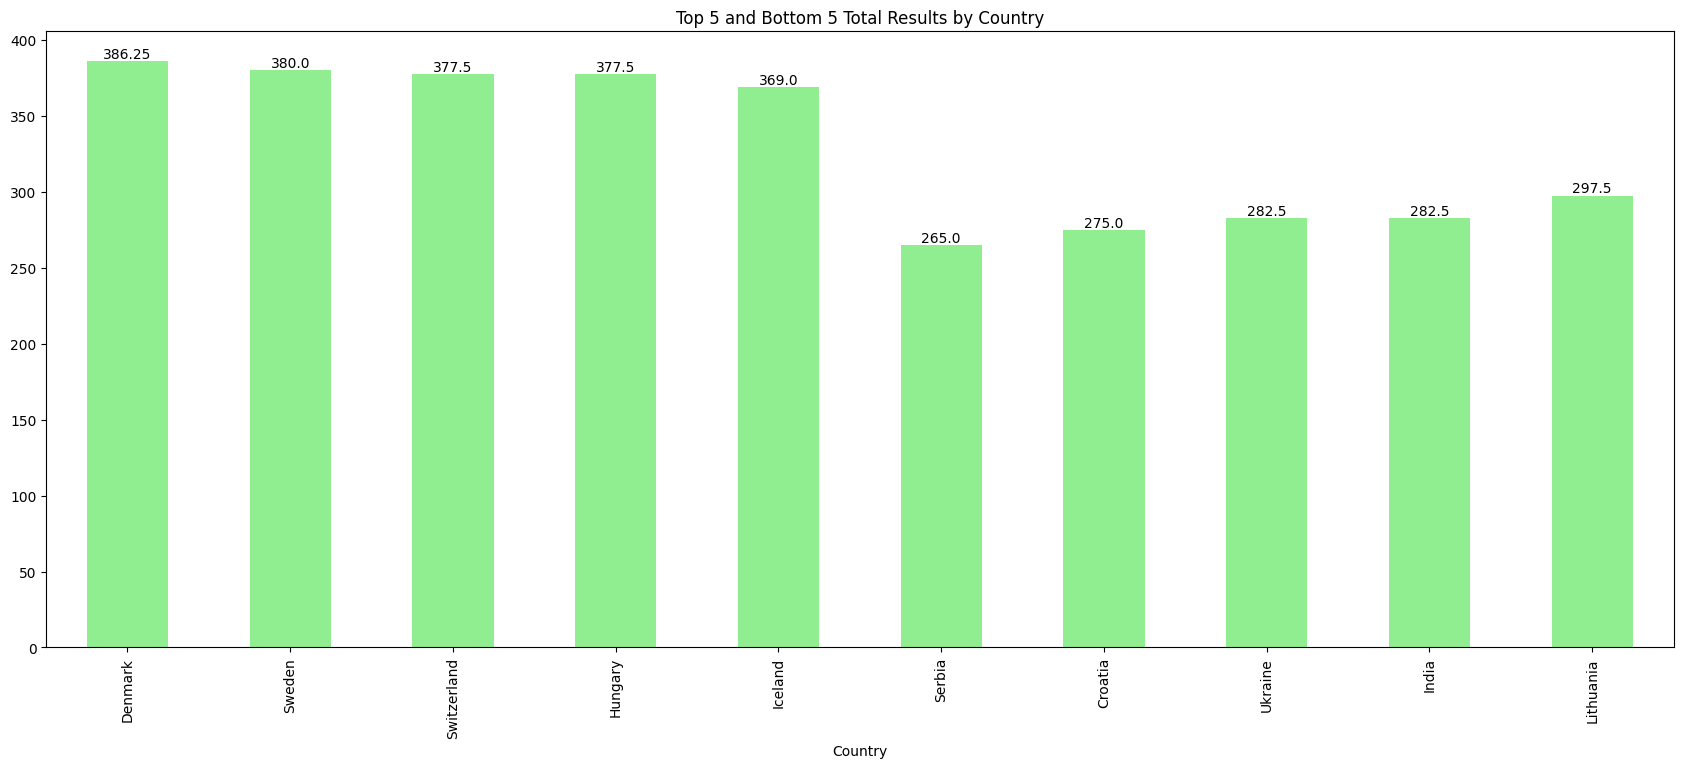

In [67]:
plt.figure(figsize=(21, 8))
only_gth_grp_median_results_chart =fixed_median_totalkg_data.plot.bar(x='Country', y='TotalKg', color='lightgreen')
plt.xticks()
plt.title('Top 5 and Bottom 5 Total Results by Country')
for i, value in enumerate(fixed_median_totalkg_data):
    only_gth_grp_median_results_chart.annotate(str(value), (i, value), ha='center', va='bottom')

In [52]:
only_gth_grp_median_results_df = only_gth_grp_median_results.reset_index(name='MedianTotalKg')
top10_total_by_country = only_gth_grp_median_results_df.head(10)
top10_total_by_country

,Country,MedianTotalKg
0,Denmark,386.25
1,Sweden,380.00
2,Switzerland,377.50
3,Hungary,377.50
4,Iceland,369.00
5,Austria,362.50
6,Ecuador,357.50
7,Spain,355.00
8,Italy,350.00
9,Ireland,350.00


In [68]:
lower_bound = top10_total_by_country['MedianTotalKg'] - 10
upper_bound = top10_total_by_country['MedianTotalKg'] + 10

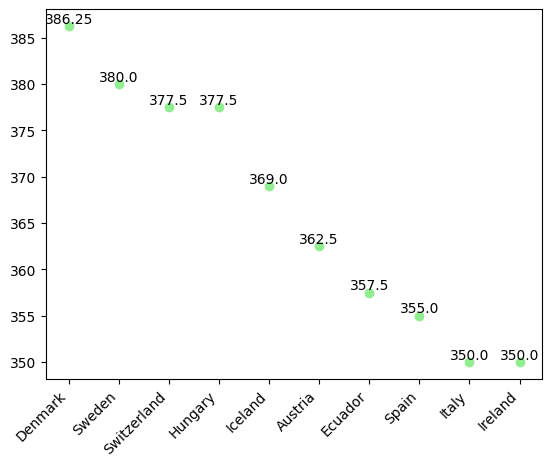

In [56]:
only_gth_grp_median_results_chart = plt.scatter(top10_total_by_country['Country'], top10_total_by_country['MedianTotalKg'], color='lightgreen')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(top10_total_by_country['MedianTotalKg']):
    plt.annotate(str(value), (top10_total_by_country['Country'].iloc[i], value), ha='center', va='bottom')

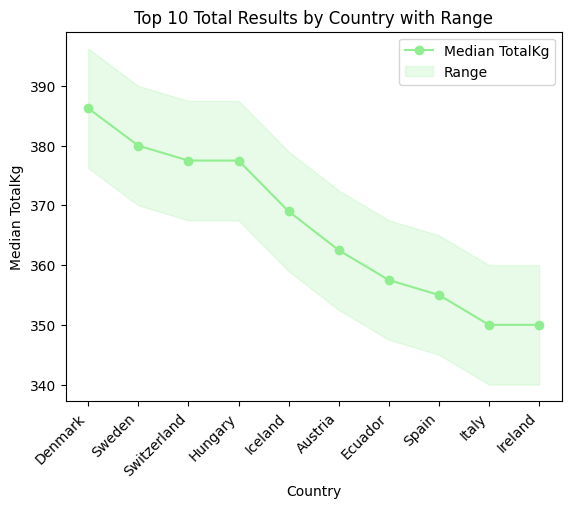

In [69]:
plt.plot(top10_total_by_country['Country'], top10_total_by_country['MedianTotalKg'], marker='o', color='lightgreen', label='Median TotalKg')
plt.fill_between(top10_total_by_country['Country'], lower_bound, upper_bound, color='lightgreen', alpha=0.2, label='Range')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Total Results by Country with Range')
plt.xlabel('Country')
plt.ylabel('Median TotalKg')
plt.legend()